# Symptom Analyser NN Pytorch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv("../data/Training.csv")
test=pd.read_csv("../data/Testing.csv")
train.shape,test.shape

((4920, 133), (41, 133))

In [3]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
train.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [6]:
df1=train.groupby('prognosis').mean()
df1.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.00,0.0,0.9,0.9,0.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


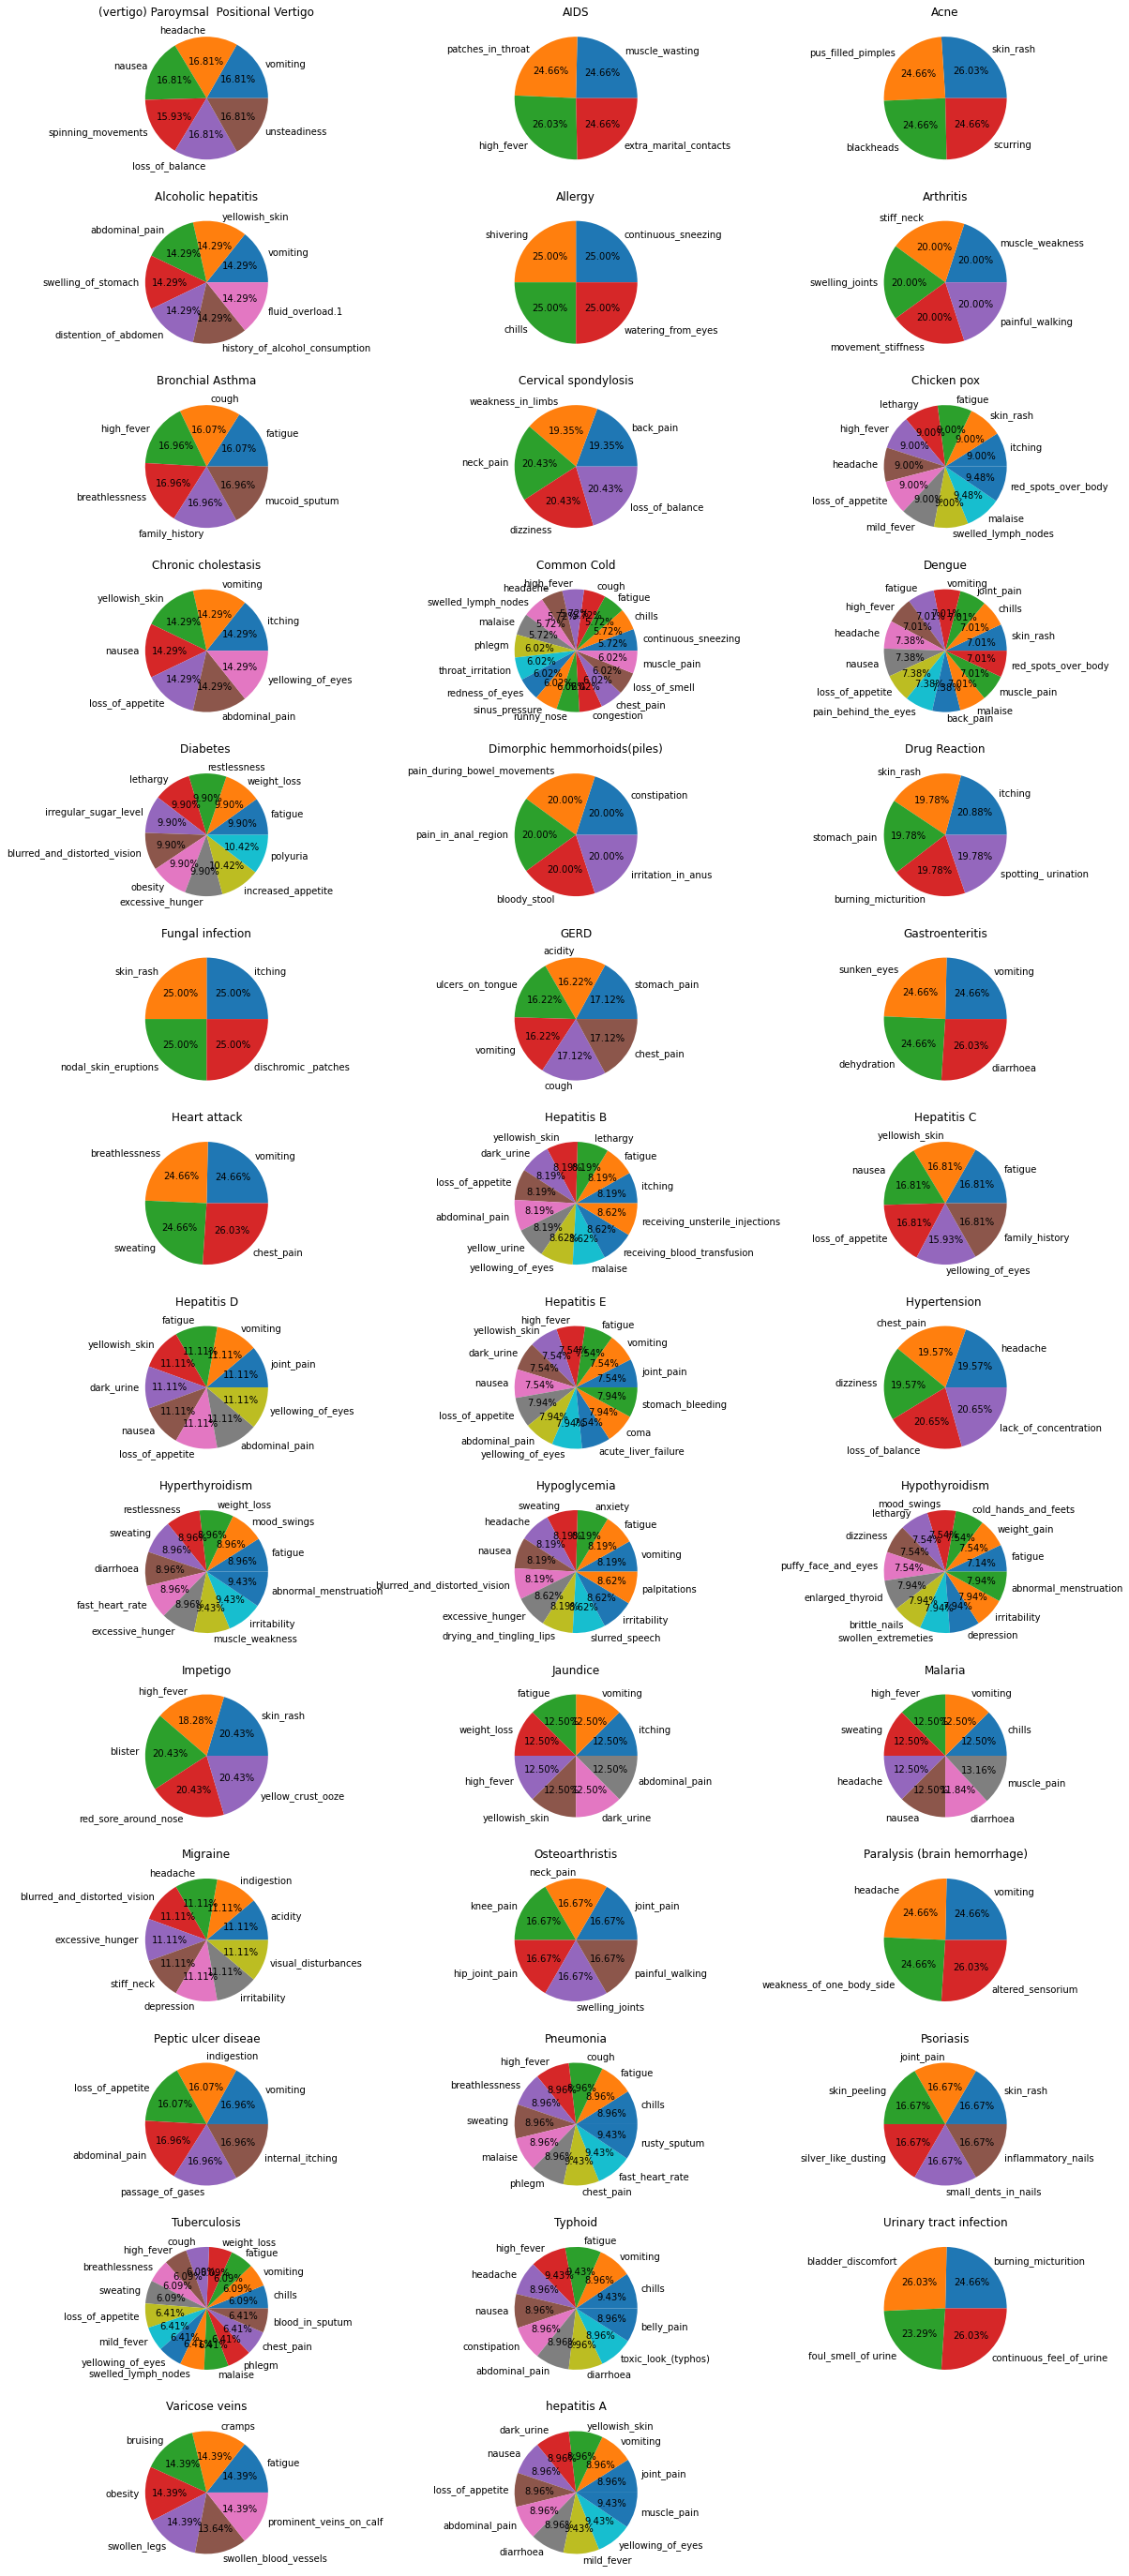

In [7]:
fig = plt.figure(figsize=(20,50))

for i, (dis, symp) in enumerate(df1.iterrows()):
    ax = plt.subplot(14,3, i+1)
    ax.set_title(symp.name)
    for idx,val in symp.items():
        if val==0:
            del symp[idx] 
    ax.pie(symp, labels=symp.index, autopct='%.2f%%')

plt.show()

In [8]:
from torch.utils.data import TensorDataset, DataLoader, random_split, ConcatDataset
from torch import nn
import torch.nn.functional as F
import numpy as np
import torch

In [9]:
diseases=dict(enumerate(train.prognosis.astype('category').cat.categories))
n_diseases=len(diseases)
diseases,n_diseases

({0: '(vertigo) Paroymsal  Positional Vertigo',
  1: 'AIDS',
  2: 'Acne',
  3: 'Alcoholic hepatitis',
  4: 'Allergy',
  5: 'Arthritis',
  6: 'Bronchial Asthma',
  7: 'Cervical spondylosis',
  8: 'Chicken pox',
  9: 'Chronic cholestasis',
  10: 'Common Cold',
  11: 'Dengue',
  12: 'Diabetes ',
  13: 'Dimorphic hemmorhoids(piles)',
  14: 'Drug Reaction',
  15: 'Fungal infection',
  16: 'GERD',
  17: 'Gastroenteritis',
  18: 'Heart attack',
  19: 'Hepatitis B',
  20: 'Hepatitis C',
  21: 'Hepatitis D',
  22: 'Hepatitis E',
  23: 'Hypertension ',
  24: 'Hyperthyroidism',
  25: 'Hypoglycemia',
  26: 'Hypothyroidism',
  27: 'Impetigo',
  28: 'Jaundice',
  29: 'Malaria',
  30: 'Migraine',
  31: 'Osteoarthristis',
  32: 'Paralysis (brain hemorrhage)',
  33: 'Peptic ulcer diseae',
  34: 'Pneumonia',
  35: 'Psoriasis',
  36: 'Tuberculosis',
  37: 'Typhoid',
  38: 'Urinary tract infection',
  39: 'Varicose veins',
  40: 'hepatitis A'},
 41)

In [10]:
train_inputs=train.columns[:-1]
train_targets=['prognosis']
n_symptoms=len(train_inputs)
symptoms=train_inputs
train_inputs, train_targets, n_symptoms

(Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
        'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
        'ulcers_on_tongue',
        ...
        'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
        'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
        'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
       dtype='object', length=132),
 ['prognosis'],
 132)

In [11]:
def dataframe_to_arrays(df):
    df1=df.copy(deep=True)
    c=df1['prognosis'].astype('category')
    df1['prognosis']=c.cat.codes
    inputs_array=df1[train_inputs].to_numpy()
    targets_array=df1[train_targets].to_numpy()
    return inputs_array, targets_array

In [12]:
inputs, targets=dataframe_to_arrays(train)
inputs=torch.from_numpy(inputs).type(torch.float32)
targets=torch.from_numpy(targets).type(torch.float32)
inputs.dtype,targets.dtype

(torch.float32, torch.float32)

In [13]:
test_inputs,test_targets=dataframe_to_arrays(test)
test_inputs=torch.from_numpy(test_inputs).type(torch.float32)
test_targets=torch.from_numpy(test_targets).type(torch.float32)
test_inputs.dtype,test_targets.dtype

(torch.float32, torch.float32)

In [14]:
df=TensorDataset(inputs,targets)
size=len(df)
size

4920

In [15]:
test_size=int(0.1*size)
val_size=int(0.2*size)
train_size=int(size - (val_size + test_size))
train_size, val_size, test_size

(3444, 984, 492)

In [16]:
torch.manual_seed(10)
train, val, test1=random_split(df,[train_size,val_size,test_size]) 
test2= TensorDataset(test_inputs, test_targets)
test= ConcatDataset([test1, test2])
len(train),len(val),len(test)

(3444, 984, 533)

In [17]:
batch_size=800
train_dl=DataLoader(train,batch_size, shuffle = True)
val_dl=DataLoader(val,batch_size*2)
test_dl=DataLoader(test,batch_size*2)

In [18]:
def Accuracy(outputs, targets):
    _, preds= torch.max(F.softmax(outputs, dim=1), dim=1)
    acc= torch.tensor(torch.sum(preds == targets).item() / len(preds))
    return acc

In [19]:
def train(model,train_data_loader, optimizer):
    losses = []
    for inputs, targets in train_data_loader:
        targets=torch.flatten(targets).long()
        outputs=model(inputs)
        loss=F.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.detach())
    return torch.stack(losses).mean().item()

In [20]:
def validate(model, val_data_loader):
    losses = []
    accuracies = []
    for inputs, targets in val_data_loader:
        targets=torch.flatten(targets).long()
        outputs=model(inputs)
        loss=F.cross_entropy(outputs, targets)
        acc=Accuracy(outputs, targets)
        losses.append(loss.detach())
        accuracies.append(acc)
    val_loss=torch.stack(losses).mean()
    val_acc=torch.stack(accuracies).mean()
    return val_loss.item(), val_acc.item()

In [21]:
def fit(model, epochs, lr, train_data_loader, val_data_loader, opt_func=torch.optim.SGD):
    history=[]
    for epoch in range(epochs):
        optimizer=opt_func(model.parameters(), lr)
        training_loss=train(model,train_data_loader, optimizer)
        validation_loss, validation_acc=validate(model,val_data_loader)
        result={'training_loss':training_loss,'validation_loss':validation_loss, 'validation_acc':validation_acc}
        history.append(result)
        if (epoch+1)%20 == 0 or epoch == 0:
            print(f"Epoch = {epoch+1}, Train Loss = {training_loss}, Validation Loss = {validation_loss}, Validation Accuracy = {validation_acc}")
    return history

In [22]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.clf = nn.Sequential(nn.Linear(self.in_features,self.out_features))                                                                          
        
    def forward(self, inputs):
        outputs = self.clf(inputs)
        return outputs
    
    def predict_single(self, input, labels):
        outputs = self(input)
        probs = torch.sigmoid(outputs)
        probs = [(idx,labels[idx],probs[idx].detach().item()) for idx in range(len(probs)) if probs[idx]>=0.8 or torch.max(probs) == probs[idx]]
        return probs

In [23]:
model = Model(n_symptoms,n_diseases)
model

Model(
  (clf): Sequential(
    (0): Linear(in_features=132, out_features=41, bias=True)
  )
)

In [24]:
result = validate(model, train_dl)
result

(3.729741334915161, 0.06721311807632446)

In [25]:
history = fit(model, 60, 1.5e-1, train_dl, val_dl)

/home/inno/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Epoch = 1, Train Loss = 3.6878151893615723, Validation Loss = 3.6205737590789795, Validation Accuracy = 0.17479674518108368
Epoch = 20, Train Loss = 1.9763396978378296, Validation Loss = 1.967256784439087, Validation Accuracy = 0.9928861856460571
Epoch = 40, Train Loss = 1.054906964302063, Validation Loss = 1.0628461837768555, Validation Accuracy = 1.0
Epoch = 60, Train Loss = 0.6199378371238708, Validation Loss = 0.6312671899795532, Validation Accuracy = 1.0


In [26]:
test_loss, test_acc = validate(model,test_dl)
test_loss, test_acc

(0.614979088306427, 1.0)

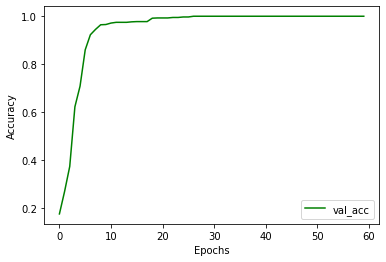

In [27]:
val_acc = [x['validation_acc'] for x in history]
plt.figure(figsize=(6,4))
plt.plot(val_acc, '-g', label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
i = torch.zeros(132)
i[0] = 1
i[34] = 1
i[11]=1
input , output = (i,1)
model.predict_single(input, diseases)

[(9, 'Chronic cholestasis', 0.8230766654014587)]

In [29]:
symptoms[0],symptoms[34],symptoms[11]

('itching', 'nausea', 'vomiting')

In [32]:
# torch.save(model,'model.pth')